# Computer Vision (CV2022): Assignment 3

### - Avirup Das (MDS202013)

### - Ayush Thada (MDS202014)

Chessboard Data: https://drive.google.com/file/d/1fUWhtYeC2i23wx4tviOBwMlS_afK2_-9/view?usp=sharing

Dot-Grid Pattern Data: https://drive.google.com/file/d/1FYCXIzwR3OlVSO4X0JrFIF0FCbjIB026/view?usp=sharing

In [ ]:
# importing libraries
import cv2, glob
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 12)

In [ ]:
# fetching images
!rm *.jpg
!gdown --id 1fUWhtYeC2i23wx4tviOBwMlS_afK2_-9
!unzip CheckerBoard.zip

rm: cannot remove '*.jpg': No such file or directory
Downloading...
From: https://drive.google.com/uc?id=1fUWhtYeC2i23wx4tviOBwMlS_afK2_-9
To: /content/CheckerBoard.zip
100% 1.08M/1.08M [00:00<00:00, 92.7MB/s]
Archive:  CheckerBoard.zip
  inflating: 1.jpg                   
  inflating: 4.jpg                   
  inflating: 2.jpg                   
  inflating: 3.jpg                   
  inflating: 5.jpg                   
  inflating: 6.jpg                   
  inflating: 8.jpg                   
  inflating: 9.jpg                   
  inflating: 7.jpg                   
  inflating: 10.jpg                  


## Question 1

In [ ]:
# Preparing object points
# The square size on the chessboard is 2.5cm x 2.4cm
objp = np.zeros((7*7,3), np.float32)
objp[:,:2] = np.mgrid[0:175:25,0:168:24].T.reshape(-1,2)
print('Object Points: ', objp, sep='\n')

Object Points: 
[[  0.   0.   0.]
 [ 25.   0.   0.]
 [ 50.   0.   0.]
 [ 75.   0.   0.]
 [100.   0.   0.]
 [125.   0.   0.]
 [150.   0.   0.]
 [  0.  24.   0.]
 [ 25.  24.   0.]
 [ 50.  24.   0.]
 [ 75.  24.   0.]
 [100.  24.   0.]
 [125.  24.   0.]
 [150.  24.   0.]
 [  0.  48.   0.]
 [ 25.  48.   0.]
 [ 50.  48.   0.]
 [ 75.  48.   0.]
 [100.  48.   0.]
 [125.  48.   0.]
 [150.  48.   0.]
 [  0.  72.   0.]
 [ 25.  72.   0.]
 [ 50.  72.   0.]
 [ 75.  72.   0.]
 [100.  72.   0.]
 [125.  72.   0.]
 [150.  72.   0.]
 [  0.  96.   0.]
 [ 25.  96.   0.]
 [ 50.  96.   0.]
 [ 75.  96.   0.]
 [100.  96.   0.]
 [125.  96.   0.]
 [150.  96.   0.]
 [  0. 120.   0.]
 [ 25. 120.   0.]
 [ 50. 120.   0.]
 [ 75. 120.   0.]
 [100. 120.   0.]
 [125. 120.   0.]
 [150. 120.   0.]
 [  0. 144.   0.]
 [ 25. 144.   0.]
 [ 50. 144.   0.]
 [ 75. 144.   0.]
 [100. 144.   0.]
 [125. 144.   0.]
 [150. 144.   0.]]


## Question 2

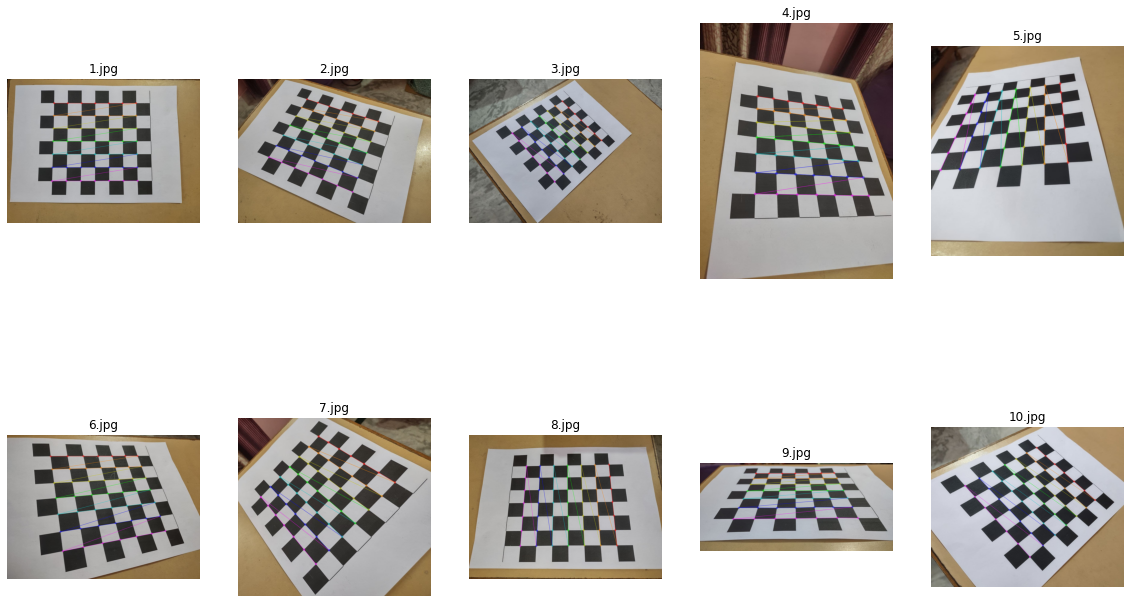

In [ ]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

# Reading images
images = glob.glob('*.jpg')
# Sorting images according to the number
images.sort(key=lambda x: int(x.split('.')[0]))

# Defining termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

fig, ax = plt.subplots(2,5)
for i in ax.flatten():
  i.axis('off')

for i, fname in enumerate(images):
    img = cv2.imread(fname) # Capture frame-by-frame
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,7), None)
    # If found, add object points, image points (after refining them)
    if ret:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,7), corners2, ret)
        ax[i//5,i%5].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax[i//5,i%5].set_title(fname)

## Question 3

In [ ]:
# calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# Rounding off the matrix and distortion coefficients
np.set_printoptions(precision=4, suppress=True)

# Displaying camera matrix and distortion paremeters
print("Intrinsic Camera Matrix:",mtx, sep='\n', end='\n\n')
print("Lens Distortion Parameters:",dist, sep='\n')

Intrinsic Camera Matrix:
[[1058.2377    0.      668.4765]
 [   0.      989.2868  425.4019]
 [   0.        0.        1.    ]]

Lens Distortion Parameters:
[[ 0.1375 -1.4753  0.0032  0.0167  2.4838]]


## Question 4

In [ ]:
# Re-Projection Error
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error
print( "total error: {}".format(mean_error/len(objpoints)) )

total error: 0.7006033134000267


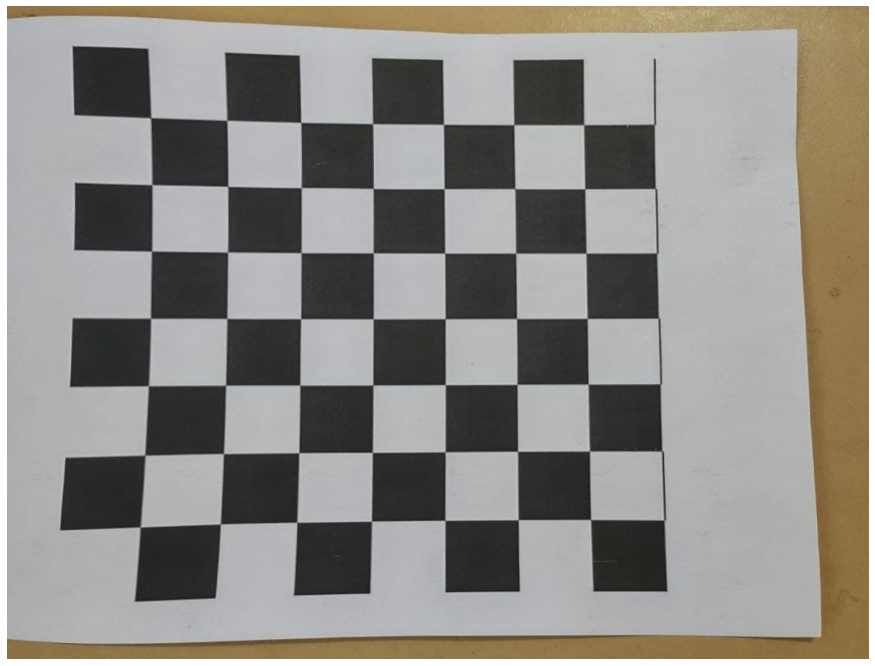

In [ ]:
# Undistorted Image
img = cv2.imread(images[0])
h,w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
plt.axis('off')
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB));

## Question 5

In [ ]:
!rm *.jpg
!gdown --id 1FYCXIzwR3OlVSO4X0JrFIF0FCbjIB026
!unzip dotgridpattern.zip

Downloading...
From: https://drive.google.com/uc?id=1FYCXIzwR3OlVSO4X0JrFIF0FCbjIB026
To: /content/dotgridpattern.zip
100% 758k/758k [00:00<00:00, 99.5MB/s]
Archive:  dotgridpattern.zip
   creating: dotgridpattern/
  inflating: __MACOSX/._dotgridpattern  
  inflating: dotgridpattern/10.jpeg  
  inflating: __MACOSX/dotgridpattern/._10.jpeg  
  inflating: dotgridpattern/1.jpeg   
  inflating: __MACOSX/dotgridpattern/._1.jpeg  
  inflating: dotgridpattern/11.jpeg  
  inflating: __MACOSX/dotgridpattern/._11.jpeg  
  inflating: dotgridpattern/6.jpeg   
  inflating: __MACOSX/dotgridpattern/._6.jpeg  
  inflating: dotgridpattern/7.jpeg   
  inflating: __MACOSX/dotgridpattern/._7.jpeg  
  inflating: dotgridpattern/8.jpeg   
  inflating: __MACOSX/dotgridpattern/._8.jpeg  
  inflating: dotgridpattern/4.jpeg   
  inflating: __MACOSX/dotgridpattern/._4.jpeg  
  inflating: dotgridpattern/14.jpeg  
  inflating: __MACOSX/dotgridpattern/._14.jpeg  
  inflating: dotgridpattern/15.jpeg  
  inflating: __

In [ ]:
# Setting up Blob Detector for the circles

# Setup SimpleBlobDetector parameters. 
blobParams = cv2.SimpleBlobDetector_Params() 

# Change thresholds 
blobParams.minThreshold = 8 
blobParams.maxThreshold = 255 

# Filter by Area. 
blobParams.filterByArea = True 
blobParams.minArea = 30
blobParams.maxArea = 2500 

# Filter by Circularity
blobParams.filterByCircularity = True 
blobParams.minCircularity = 0.1 

# Filter by Convexity 
blobParams.filterByConvexity = True 
blobParams.minConvexity = 0.87 

# Filter by Inertia 
blobParams.filterByInertia = True 
blobParams.minInertiaRatio = 0.01 
blobParams.minDistBetweenBlobs = 2

# Create a detector with the parameters 
blobDetector = cv2.SimpleBlobDetector_create(blobParams)

# Preparing object points
# The distance between the centres of the blobs is 2.2cm
objp = np.zeros((10*10,3), np.float32)
objp[:,:2] = np.mgrid[0:220:22,0:220:22].T.reshape(-1,2)

print('Object Points: ', objp, sep='\n')

Object Points: 
[[  0.   0.   0.]
 [ 22.   0.   0.]
 [ 44.   0.   0.]
 [ 66.   0.   0.]
 [ 88.   0.   0.]
 [110.   0.   0.]
 [132.   0.   0.]
 [154.   0.   0.]
 [176.   0.   0.]
 [198.   0.   0.]
 [  0.  22.   0.]
 [ 22.  22.   0.]
 [ 44.  22.   0.]
 [ 66.  22.   0.]
 [ 88.  22.   0.]
 [110.  22.   0.]
 [132.  22.   0.]
 [154.  22.   0.]
 [176.  22.   0.]
 [198.  22.   0.]
 [  0.  44.   0.]
 [ 22.  44.   0.]
 [ 44.  44.   0.]
 [ 66.  44.   0.]
 [ 88.  44.   0.]
 [110.  44.   0.]
 [132.  44.   0.]
 [154.  44.   0.]
 [176.  44.   0.]
 [198.  44.   0.]
 [  0.  66.   0.]
 [ 22.  66.   0.]
 [ 44.  66.   0.]
 [ 66.  66.   0.]
 [ 88.  66.   0.]
 [110.  66.   0.]
 [132.  66.   0.]
 [154.  66.   0.]
 [176.  66.   0.]
 [198.  66.   0.]
 [  0.  88.   0.]
 [ 22.  88.   0.]
 [ 44.  88.   0.]
 [ 66.  88.   0.]
 [ 88.  88.   0.]
 [110.  88.   0.]
 [132.  88.   0.]
 [154.  88.   0.]
 [176.  88.   0.]
 [198.  88.   0.]
 [  0. 110.   0.]
 [ 22. 110.   0.]
 [ 44. 110.   0.]
 [ 66. 110.   0.]
 [ 88. 110. 

Number of images retained during blob detection:  12


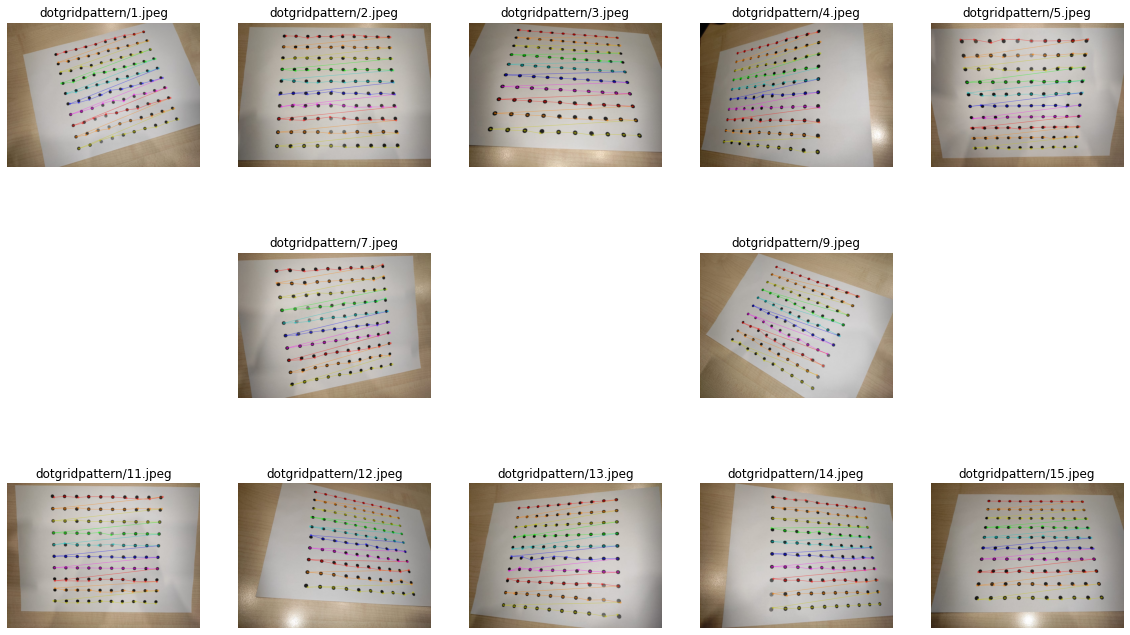

In [ ]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

# Reading images
images = glob.glob('dotgridpattern/*.jpeg')
# Sorting images according to the number
images.sort(key=lambda x: int(x.split('/')[1].split('.')[0]))

# Defining termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Counter for images where corners were detected
found = 0

fig, ax = plt.subplots(3,5)
for i in ax.flatten():
  i.axis('off')

for i, fname in enumerate(images):
    img = cv2.imread(fname) # Capture frame by frame
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Detecting blobs
    keypoints = blobDetector.detect(img)
    # Draw detected blobs as red circles
    im_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,255,0),
                                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    im_with_keypoints_gray = cv2.cvtColor(im_with_keypoints, cv2.COLOR_BGR2GRAY)
    
    
    # Find the chess board corners
    ret, corners = cv2.findCirclesGrid(im_with_keypoints_gray, (10,10), None,
                                      blobDetector = blobDetector)
    
    # If found, add object points, image points (after refining them)
    if ret:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(im_with_keypoints_gray, corners,
                                    (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (10,10), corners2, ret)
        #gray = cv2.drawChessboardCorners(gray, (7,7), corners2, ret)
        ax[i//5,i%5].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        #ax[i//5,i%5].imshow(img, interpolation='nearest')
        ax[i//5,i%5].set_title(fname)

        found+=1

print('Number of images retained during blob detection: ',found)

In [ ]:
# calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, im_with_keypoints_gray.shape[::-1], None, None)

# Rounding off the matrix and distortion coefficients
np.set_printoptions(precision=4, suppress=True)

# Displaying camera matrix and distortion paremeters
print("Intrinsic Camera Matrix:",mtx, sep='\n', end='\n\n')
print("Lens Distortion Parameters:",dist, sep='\n')

Intrinsic Camera Matrix:
[[891.4379   0.     564.3625]
 [  0.     887.6966 422.0732]
 [  0.       0.       1.    ]]

Lens Distortion Parameters:
[[-0.0368  0.2127 -0.0046 -0.0018 -0.4386]]


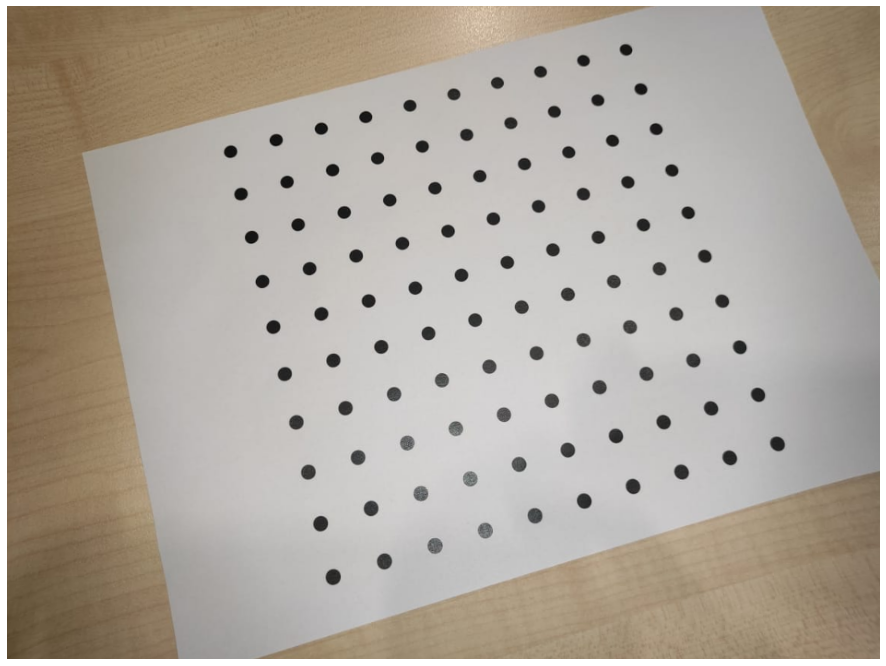

In [ ]:
# Undistorted Image
img = cv2.imread(images[0])
h,w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
plt.axis('off')
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB));

In [5]:
lrs=[1,2,3,4,5,6]
print(lrs[0:-1])

[1, 2, 3, 4, 5]
